In [1]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
path=Path("./datasets/Train/Images/")

In [3]:
image_data=[]

for img_path in path.glob("*.jpg"):
    img=image.load_img(img_path,target_size=(500,500))
    img_array=image.img_to_array(img)
    image_data.append(img_array)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\PIL\Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [4]:
X=np.array(image_data)
print(X.shape)

(304, 500, 500, 3)


In [5]:
Xtrain=X.reshape(304,750000)

In [6]:
print(Xtrain[0])

[144. 189. 231. ...  80. 140. 212.]


In [7]:
u=np.mean(Xtrain,axis=0)
std=np.std(Xtrain,axis=0)

In [8]:
Xtrain=(Xtrain-u)/std

In [9]:
import pandas as pd

In [10]:
data=pd.read_csv("./datasets/Train/train.csv")

In [11]:
pokemon=data['NameOfPokemon']

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()

In [14]:
Ytrain=le.fit_transform(pokemon)

In [15]:
print(Ytrain)
print(le.inverse_transform([1,2,0]))

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]
['Charmander' 'Pikachu' 'Bulbasaur']


In [16]:
from sklearn import svm

In [17]:
svc=svm.SVC(C=0.1,kernel='linear')

In [ ]:
svc.fit(Xtrain,Ytrain)

In [ ]:
svc.score(Xtrain,Ytrain)

In [69]:
path1=Path('./datasets/Test/Images/')

In [70]:
test_images=[]
for img_path in path1.glob("*.jpg"):
    img=image.load_img(img_path,target_size=(500,500))
    img=image.img_to_array(img)
    test_images.append(img)

In [71]:
Xtest=np.array(test_images)

In [72]:
print(Xtest.shape)

(123, 500, 500, 3)


In [73]:
XXtest=Xtest.reshape(Xtest.shape[0],750000)

In [74]:
u=np.mean(XXtest,axis=0)
std=np.std(XXtest,axis=0)

In [75]:
xtest=(XXtest-u)/std

In [76]:
ypred=svc.predict(xtest)

In [77]:
print(ypred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1]


In [78]:
ydata=le.inverse_transform(ypred)

In [79]:
print(ydata)

['Bulbasaur' 'Bulbasaur' 'Bulbasaur' 'Bulbasaur' 'Bulbasaur' 'Bulbasaur'
 'Bulbasaur' 'Bulbasaur' 'Bulbasaur' 'Bulbasaur' 'Bulbasaur' 'Bulbasaur'
 'Bulbasaur' 'Bulbasaur' 'Bulbasaur' 'Bulbasaur' 'Bulbasaur' 'Bulbasaur'
 'Bulbasaur' 'Bulbasaur' 'Bulbasaur' 'Bulbasaur' 'Bulbasaur' 'Bulbasaur'
 'Bulbasaur' 'Bulbasaur' 'Bulbasaur' 'Bulbasaur' 'Bulbasaur' 'Bulbasaur'
 'Bulbasaur' 'Bulbasaur' 'Bulbasaur' 'Bulbasaur' 'Bulbasaur' 'Bulbasaur'
 'Bulbasaur' 'Bulbasaur' 'Bulbasaur' 'Bulbasaur' 'Bulbasaur' 'Pikachu'
 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu'
 'Pikachu' 'Bulbasaur' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu'
 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Charmander' 'Pikachu' 'Pikachu'
 'Pikachu' 'Charmander' 'Pikachu' 'Charmander' 'Pikachu' 'Pikachu'
 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu'
 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Pikachu' 'Charmander'
 'Charmander' 'Charmander' 'Charmander' 'Charmander' 'Charman

In [80]:
image=[]
for image_path in path1.glob("*.jpg"):
    path=str(image_path)
    path=path[-8:]
    image.append(path)

In [81]:
d={}
for i in range(len(ydata)):
    d[image[i]]=ydata[i]


In [82]:
dd=pd.read_csv("./datasets/Test/test.csv")

In [83]:
y=dd['ImageId']

In [84]:
y=y.tolist()

In [85]:
y_image=[]

for i in y:
    a=d[i]
    y_image.append(a)
    

In [86]:
print(y_image)
dd["NameOfPokemon"]=y_image


['Bulbasaur', 'Charmander', 'Bulbasaur', 'Charmander', 'Pikachu', 'Pikachu', 'Pikachu', 'Bulbasaur', 'Bulbasaur', 'Charmander', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Charmander', 'Bulbasaur', 'Charmander', 'Charmander', 'Pikachu', 'Charmander', 'Pikachu', 'Bulbasaur', 'Charmander', 'Bulbasaur', 'Charmander', 'Charmander', 'Bulbasaur', 'Bulbasaur', 'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu', 'Charmander', 'Bulbasaur', 'Pikachu', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Charmander', 'Bulbasaur', 'Bulbasaur', 'Charmander', 'Pikachu', 'Charmander', 'Charmander', 'Bulbasaur', 'Charmander', 'Bulbasaur', 'Charmander', 'Charmander', 'Pikachu', 'Charmander', 'Pikachu', 'Bulbasaur', 'Charmander', 'Bulbasaur', 'Charmander', 'Pikachu', 'Pikachu', 'Charmander', 'Charmander', 'Pikachu', 'Charmander', 'Bulbasaur', 'Pikachu', 'Pikachu', 'Bulbasaur', 'Charmander', 'Pikachu', 'Bulbasaur', 'Charmander', 'Bulbasaur', 'Bulbasaur', 'Pikachu', 'Charmander', 'Charmander', 'Charmander', 'Charmand

In [87]:
dd.head()

,ImageId,NameOfPokemon
0,1106.jpg,Bulbasaur
1,2236.jpg,Charmander
2,1131.jpg,Bulbasaur
3,2221.jpg,Charmander
4,2011.jpg,Pikachu


In [88]:
df=pd.DataFrame(dd)
df.to_csv("Submission.csv",index=False)

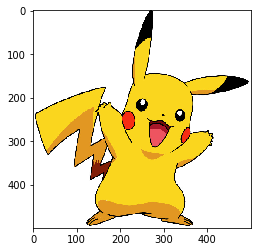

Pikachu


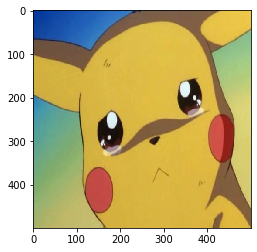

Pikachu


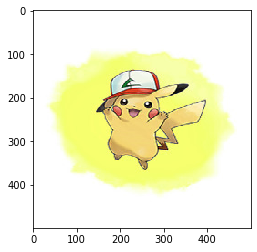

Pikachu


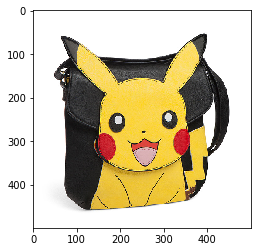

Pikachu


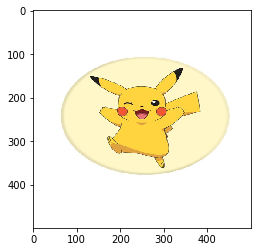

Pikachu


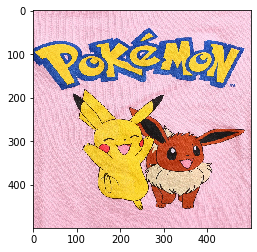

Charmander


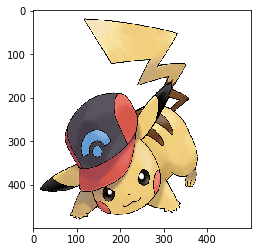

Pikachu


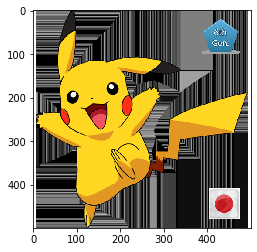

Pikachu


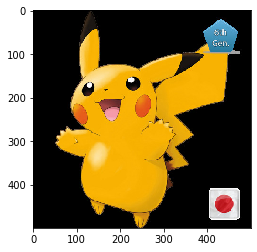

Pikachu


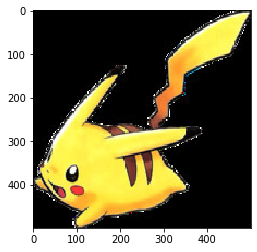

Charmander


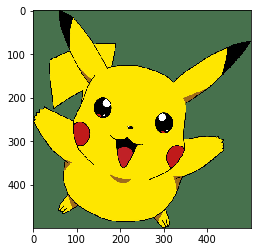

Pikachu


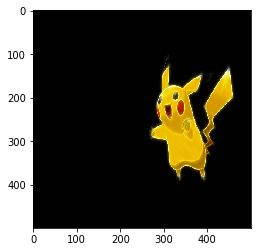

Charmander


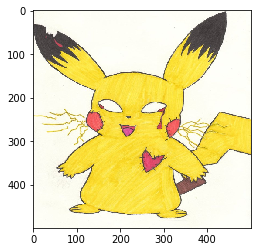

Pikachu


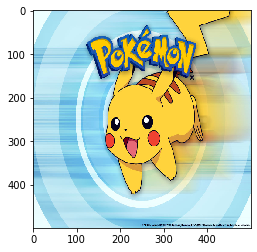

Pikachu


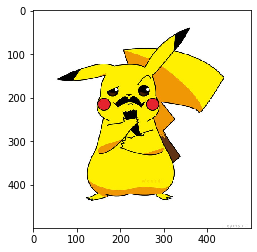

Pikachu


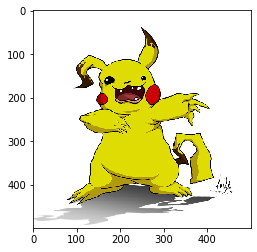

Pikachu


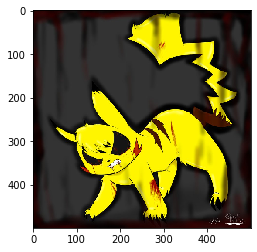

Pikachu


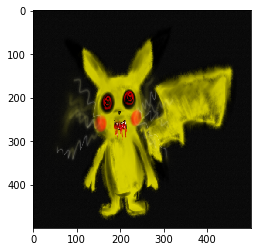

Pikachu


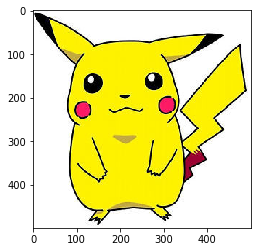

Pikachu


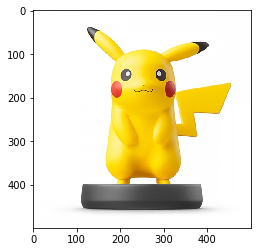

Pikachu


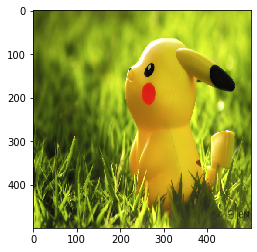

Pikachu


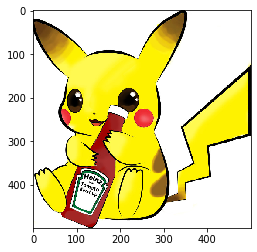

Pikachu


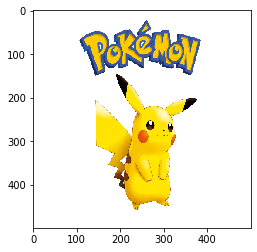

Pikachu


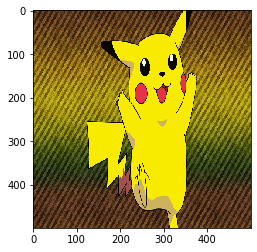

Pikachu


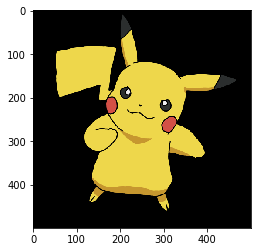

Pikachu


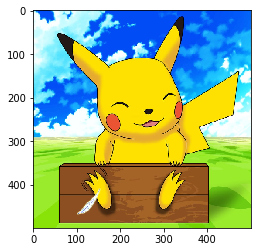

Pikachu


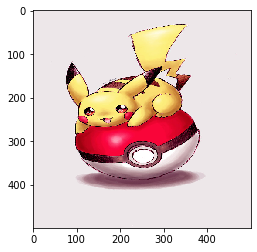

Pikachu


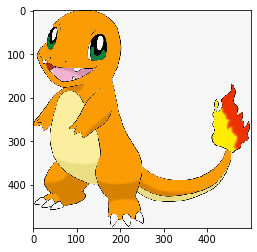

Charmander


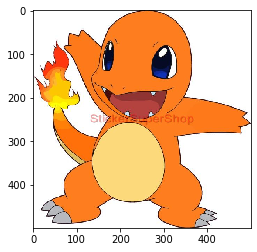

Charmander


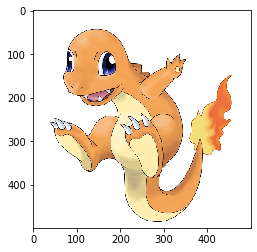

Charmander


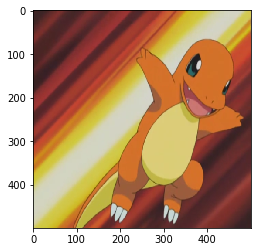

Charmander


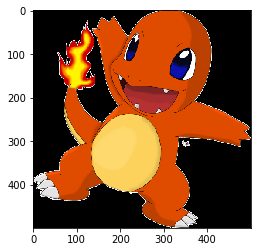

Charmander


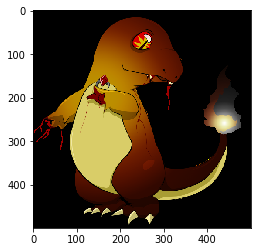

Charmander


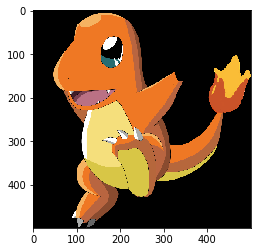

Charmander


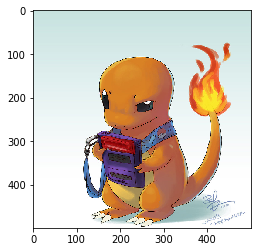

Charmander


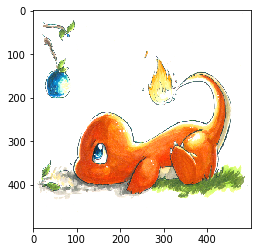

Charmander


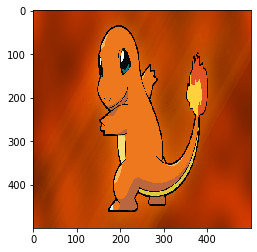

Charmander


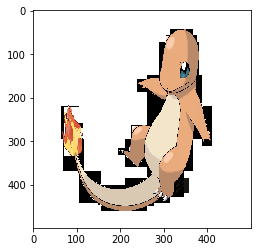

Charmander


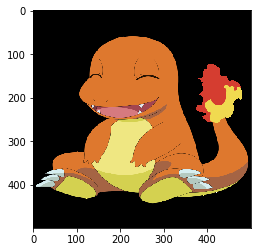

Charmander


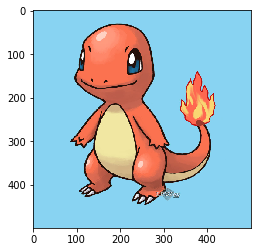

Charmander


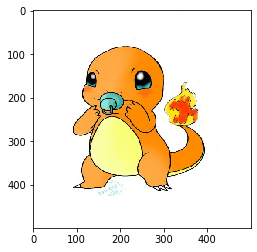

Charmander


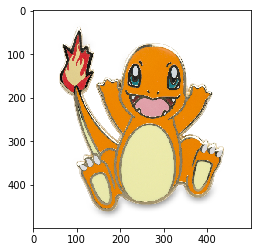

Charmander


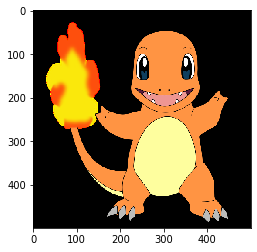

Charmander


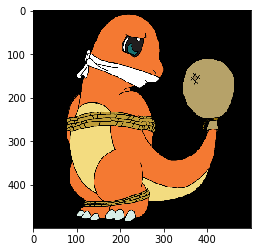

Charmander


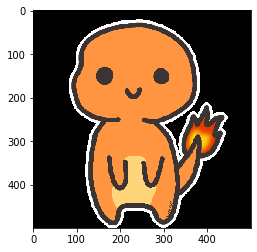

Charmander


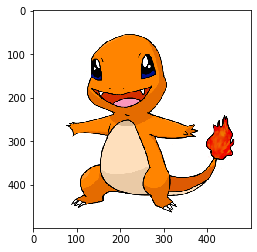

Charmander


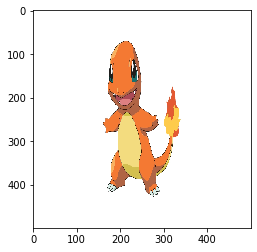

Charmander


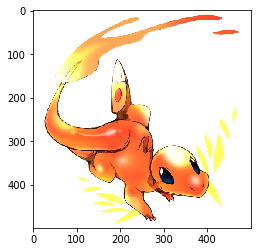

Charmander


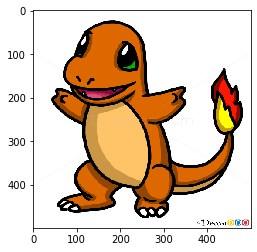

Charmander


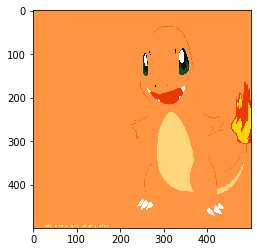

Charmander


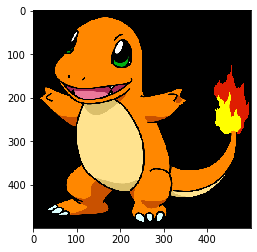

Charmander


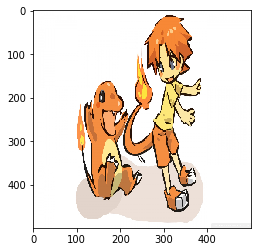

Charmander


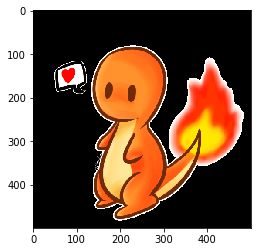

Charmander


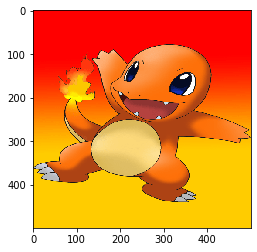

Charmander


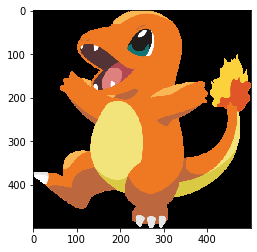

Charmander


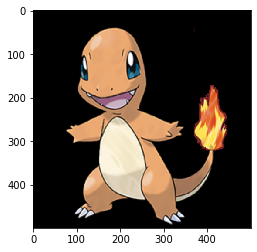

Charmander


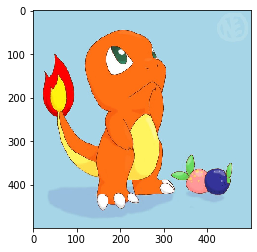

Charmander


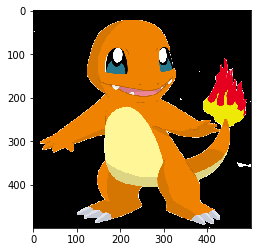

Charmander


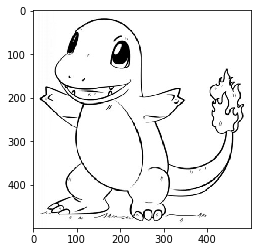

Bulbasaur


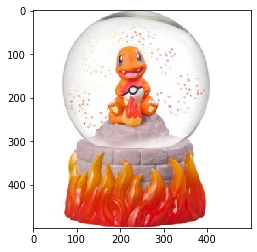

Charmander


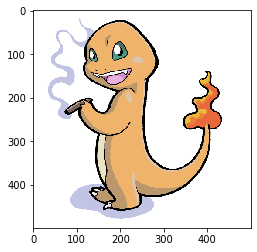

Charmander


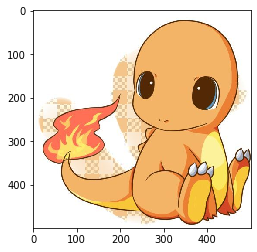

Charmander


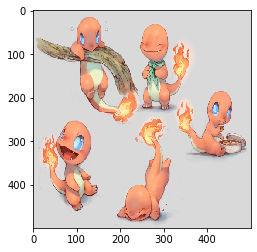

Charmander


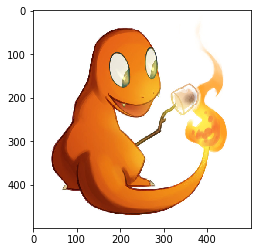

Charmander


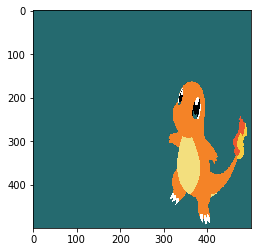

Charmander


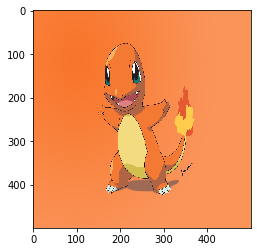

Charmander


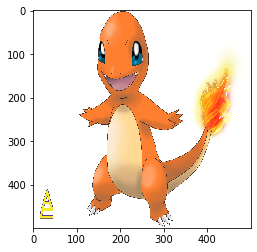

Charmander


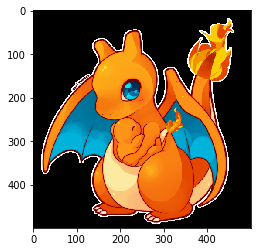

Charmander


In [89]:
for i in range(55,123):
    plt.imshow(Xtest[i]/255)
    plt.show()
    print(ydata[i])